
# Post - Surgical Complication Prediction


### Problem Statement 
**Develop a machine learning model that utilizes patient demographic data and medical history to accurately predict the risk of postoperative complications.**

### Motivation 
*  Surgical patients are automatically at risk of suffering postoperative complications, despite decades of scientific and technological advancement. 
* The accurate prediction of individual outcomes has the potential to completely reshape the future of postoperative management.

* Through such prediction, individual prioperative treatment, postoperative management, and this would allow for clinical decision-making.



### Objective
* To build machine learning model for predicting postsurgical complication
* To determine which factors have the greatest impact on postsurgical complications

### Data understanding
* Data Source : https://www.kaggle.com
* There are 25 variables and 14635 total datapoints.
* Target variable is complication 
     * Yes : Patient has postsurgical complication
     * No  : Patient does not have postsurgical complication
* The patient's demographic and medical historical data are independent variables.
     * BMI             : Body mass index of patient
     * Age 
     * mortality_rsi   : Mortality Risk Stratification Index used to predict risk of mortality
     * mort30          : Mortality within 30 days of surgery 
     * moonphase       : Phases of moon viz.New moon , First Quater , Full Moon , Third Quater
     * Month           : Month of the year in which surgery is performed.
     * hour            : The time of day at which surgery is performed.
     * Gender          : Whther patient is male or female.
     * dow             : The day of the week on which surgery is performed.
     * complication_rsi: The Complication Risk Stratification Index (RSI) 
     * ccsMort30Rate   : The 30-day mortality rate 
     * ahrq_ccs        : The Agency for Healthcare Research and Quality (AHRQ) is a tool used to group diagnoses and procedures                          into clinically meaningful categories for research and analysis.
     * baseline_pulmonary: Baseline pulmonary disease.
     * baseline_psych    : psychological conditions, such as depression and anxiety.
     * baseline_osteoart : Baseline osteoarthritis.
     * baseline_digestive: Baseline digestive disease 
     * baseline_diabetes : Baseline diabetes. 
     * baseline_dementia : whether a patient has a diagnosis of dementia prior to surgery
     * baseline_cvd      :whether a patient has a cardiovascular disease prior to surgery
     * baseline_charlson : The Charlson Comorbidity Index (CCI)
     * baseline_cancer   : This feature indicates whether a patient has a diagnosis of cancer prior to surgery.
     * asa_status        : The American Society of Anesthesiologists used to access patients health status prior to the surgery.
     * race              : Whether patient is Caucasoid, Negroid, and Mongoloid.




In [1]:
# Data preprocessing and manipulation
import pandas                as pd
import numpy                 as np

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.gridspec as gridspec
%matplotlib inline

# Converting non numeric value to numeric
from sklearn.preprocessing  import LabelEncoder

# Train test split
from sklearn.model_selection import train_test_split

# Model Building and evaluation
from sklearn.linear_model        import LogisticRegression
from sklearn.tree                import DecisionTreeClassifier
from sklearn.ensemble            import RandomForestClassifier
from sklearn.metrics             import confusion_matrix , recall_score , accuracy_score , precision_score , f1_score , classification_report

# Hyperparamer Tunning
from sklearn.model_selection import GridSearchCV

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data

df = pd.read_csv(r"D:\Data Science\Imarticus Learning\Capstone Project 1\Postoperative_complication.csv")

In [3]:
# Making copy of the data

df_copy = df.copy(deep=True)

In [4]:
df.head(6)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,Yes,0,No,No,No,No,No,...,-0.57,Thursday,Female,7.63,July,First Quarter,No,-0.43,1,No
1,18.73,59.1,0,No,0,No,No,No,No,No,...,0.21,Monday,Female,12.93,January,First Quarter,No,-0.41,1,No
2,21.85,59.0,0,No,0,No,No,No,No,No,...,0.00,Wednesday,Female,7.68,June,Third Quarter,No,0.08,1,No
3,18.49,59.0,1,No,1,No,No,Yes,Yes,No,...,-0.65,Wednesday,Male,7.58,May,Third Quarter,No,-0.32,1,No
4,19.70,59.0,1,No,0,No,No,No,No,No,...,0.00,Monday,Female,7.88,December,New Moon,No,0.00,1,No
5,20.24,59.0,0,Yes,0,No,No,No,No,No,...,0.00,Tuesday,Female,7.63,January,Third Quarter,No,0.15,1,No


In [5]:
df.Age = df.Age.round()

In [6]:
df.shape

(14635, 25)

* There are 14635 rows and 25 columns in the dataset

### Missing Value Analysis

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

### Duplicate Values

In [8]:
df.duplicated().value_counts()

False    11733
True      2902
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(11733, 25)

### Checking Datatype of all variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11733 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  11733 non-null  float64
 1   Age                  11733 non-null  float64
 2   asa_status           11733 non-null  int64  
 3   baseline_cancer      11733 non-null  object 
 4   baseline_charlson    11733 non-null  int64  
 5   baseline_cvd         11733 non-null  object 
 6   baseline_dementia    11733 non-null  object 
 7   baseline_diabetes    11733 non-null  object 
 8   baseline_digestive   11733 non-null  object 
 9   baseline_osteoart    11733 non-null  object 
 10  baseline_psych       11733 non-null  object 
 11  baseline_pulmonary   11733 non-null  object 
 12  ahrq_ccs             11733 non-null  int64  
 13  ccsComplicationRate  11733 non-null  float64
 14  ccsMort30Rate        11733 non-null  float64
 15  complication_rsi     11733 non-null  floa

### Let us see how many Object type features are actually Categorical

In [11]:
df.select_dtypes('object').apply(pd.Series.nunique , axis = 0)

baseline_cancer        2
baseline_cvd           2
baseline_dementia      2
baseline_diabetes      2
baseline_digestive     2
baseline_osteoart      2
baseline_psych         2
baseline_pulmonary     2
dow                    5
gender                 2
month                 12
moonphase              4
mort30                 2
complication           2
dtype: int64

### Variables which are continuous

In [12]:
Continuous_Variables  = []
for var in df.columns[:]:
    if (df[var].dtypes == 'int64') | (df[var].dtypes == 'float64'):
        Continuous_Variables.append(var)
Continuous_Variables        

['bmi',
 'Age',
 'asa_status',
 'baseline_charlson',
 'ahrq_ccs',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'hour',
 'mortality_rsi',
 'race']

### Let's explore the data

### Box Plot

<AxesSubplot:>

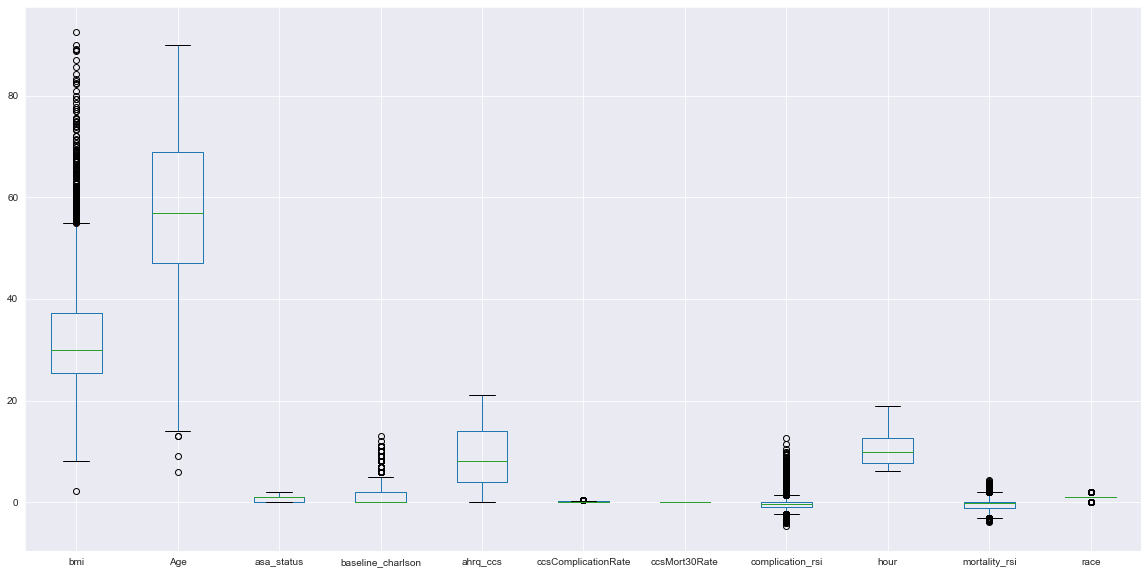

In [13]:
plt.figure(figsize=(20 , 10))
df.boxplot()

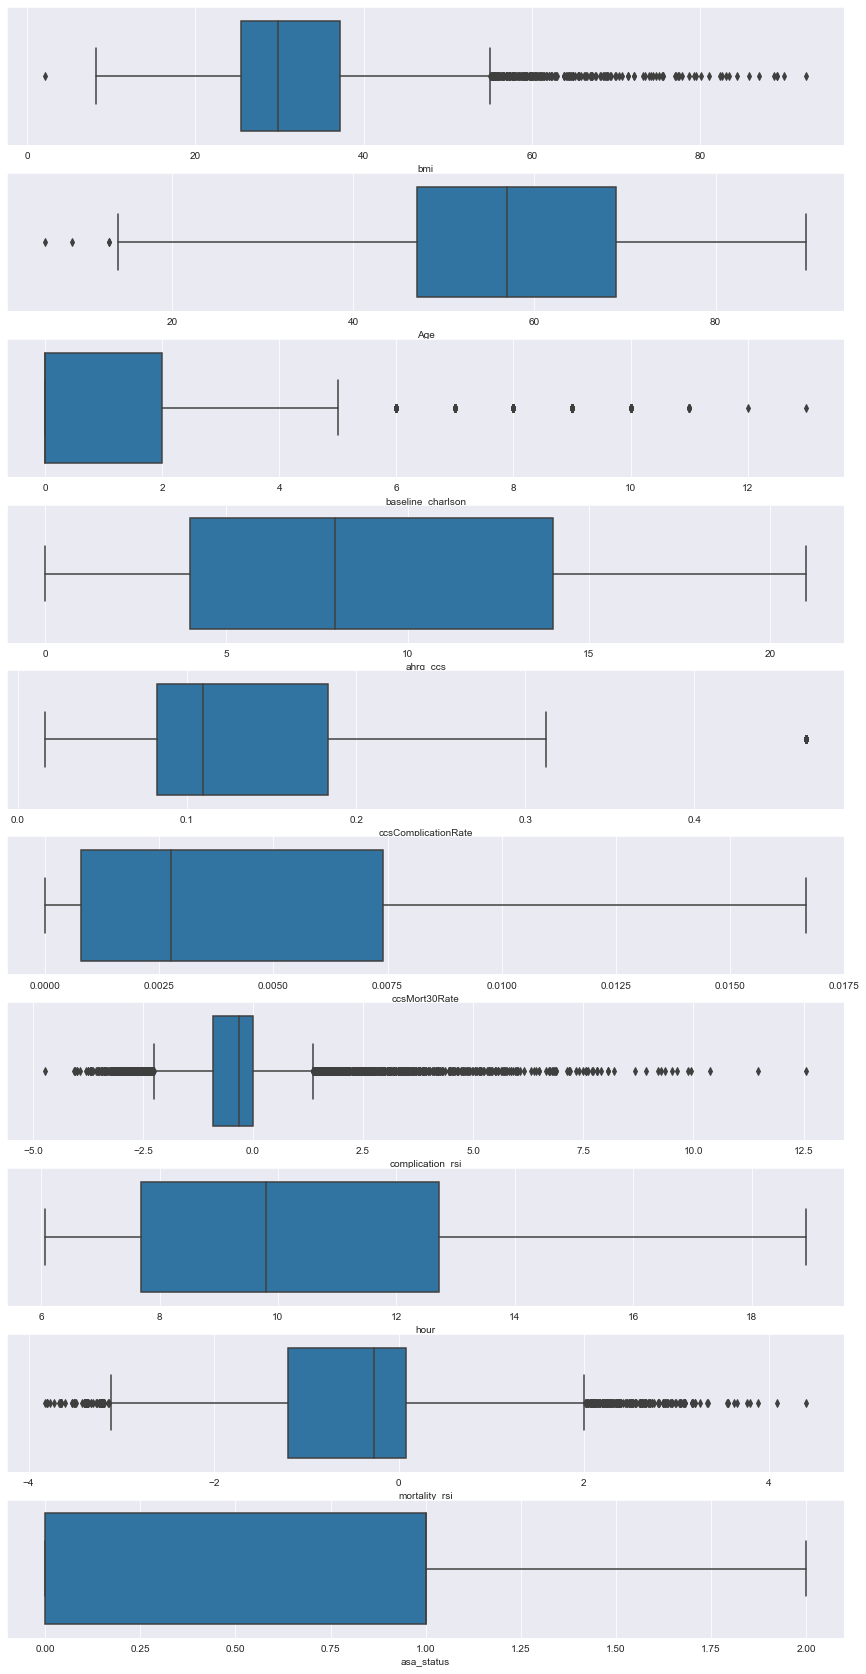

In [14]:
fig , axs = plt.subplots(10 , figsize =(15 , 30))

plt1 = sns.boxplot(df.bmi , ax = axs[0])
plt2 = sns.boxplot(df.Age , ax = axs[1])
plt3 = sns.boxplot(df.baseline_charlson , ax = axs[2])
plt4 = sns.boxplot(df.ahrq_ccs , ax = axs[3])
plt5 = sns.boxplot(df.ccsComplicationRate , ax = axs[4])
plt6 = sns.boxplot(df.ccsMort30Rate , ax = axs[5])
plt7 = sns.boxplot(df.complication_rsi , ax = axs[6])
plt8 = sns.boxplot(df.hour , ax = axs[7])
plt10 = sns.boxplot(df.mortality_rsi , ax = axs[8])
plt11 = sns.boxplot(df.asa_status , ax = axs[9])

## Exploratory Data Analysis

### Univariate Analysis

In [15]:
df.describe()

,bmi,Age,asa_status,baseline_charlson,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,hour,mortality_rsi,race
count,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000
mean,31.868385,56.581437,0.541379,1.219296,9.265831,0.146330,0.004814,-0.384690,10.431716,-0.487154,0.899514
std,9.014059,13.663206,0.567410,1.887267,6.573821,0.094482,0.005047,1.318841,2.912697,1.078118,0.404809
min,2.150000,6.000000,0.000000,0.000000,0.000000,0.016118,0.000000,-4.720000,6.070000,-3.820000,0.000000
25%,25.390000,47.000000,0.000000,0.000000,4.000000,0.081977,0.000789,-0.900000,7.680000,-1.200000,1.000000
50%,29.860000,57.000000,1.000000,0.000000,8.000000,0.109369,0.002764,-0.330000,9.800000,-0.270000,1.000000
75%,37.220000,69.000000,1.000000,2.000000,14.000000,0.183370,0.007398,0.000000,12.720000,0.080000,1.000000
max,92.590000,90.000000,2.000000,13.000000,21.000000,0.466129,0.016673,12.560000,18.920000,4.400000,2.000000


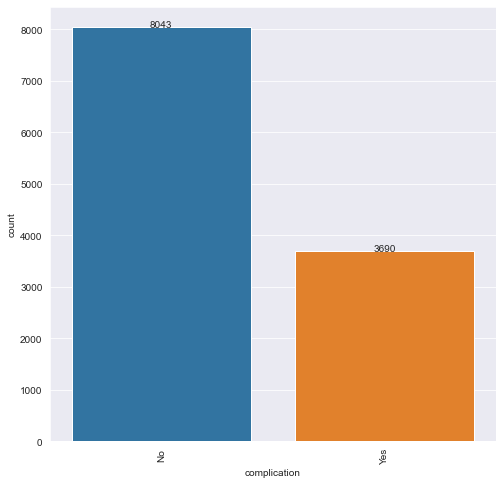

In [16]:
# Lets Display Count on top of countplot
fig, ax1 = plt.subplots(figsize=(8,8))
graph = sns.countplot(ax=ax1,x='complication', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Text(0.5, 1.0, 'Pie Chart')

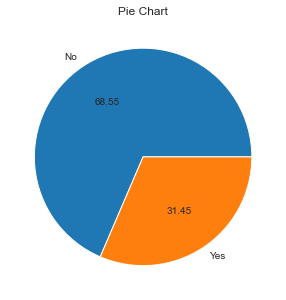

In [17]:
# Pie Chart
plt.figure(figsize=(7 , 5))
df.groupby(df.complication).size().plot(kind = 'pie' , autopct = '%.2f' )
plt.title("Pie Chart")

* In the dataset, 66.55% data corresponds to patients who did not experience postoperative complications (class 0), while a smaller portion (31.45%) represents patients who did have postoperative complications (class 1).
* This indicates that there is an imbalance in the dataset, with class 0 being more dominant than the other.

Text(0.5, 1.0, 'Pie Chart')

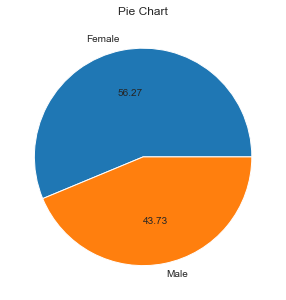

In [18]:
# Pie Chart
plt.figure(figsize=(8, 5) )
df.groupby(df.gender).size().plot(kind = 'pie' , autopct = '%.2f')
plt.title("Pie Chart")

* Female patients are more than male patients in the dataset.

<AxesSubplot:xlabel='mort30', ylabel='count'>

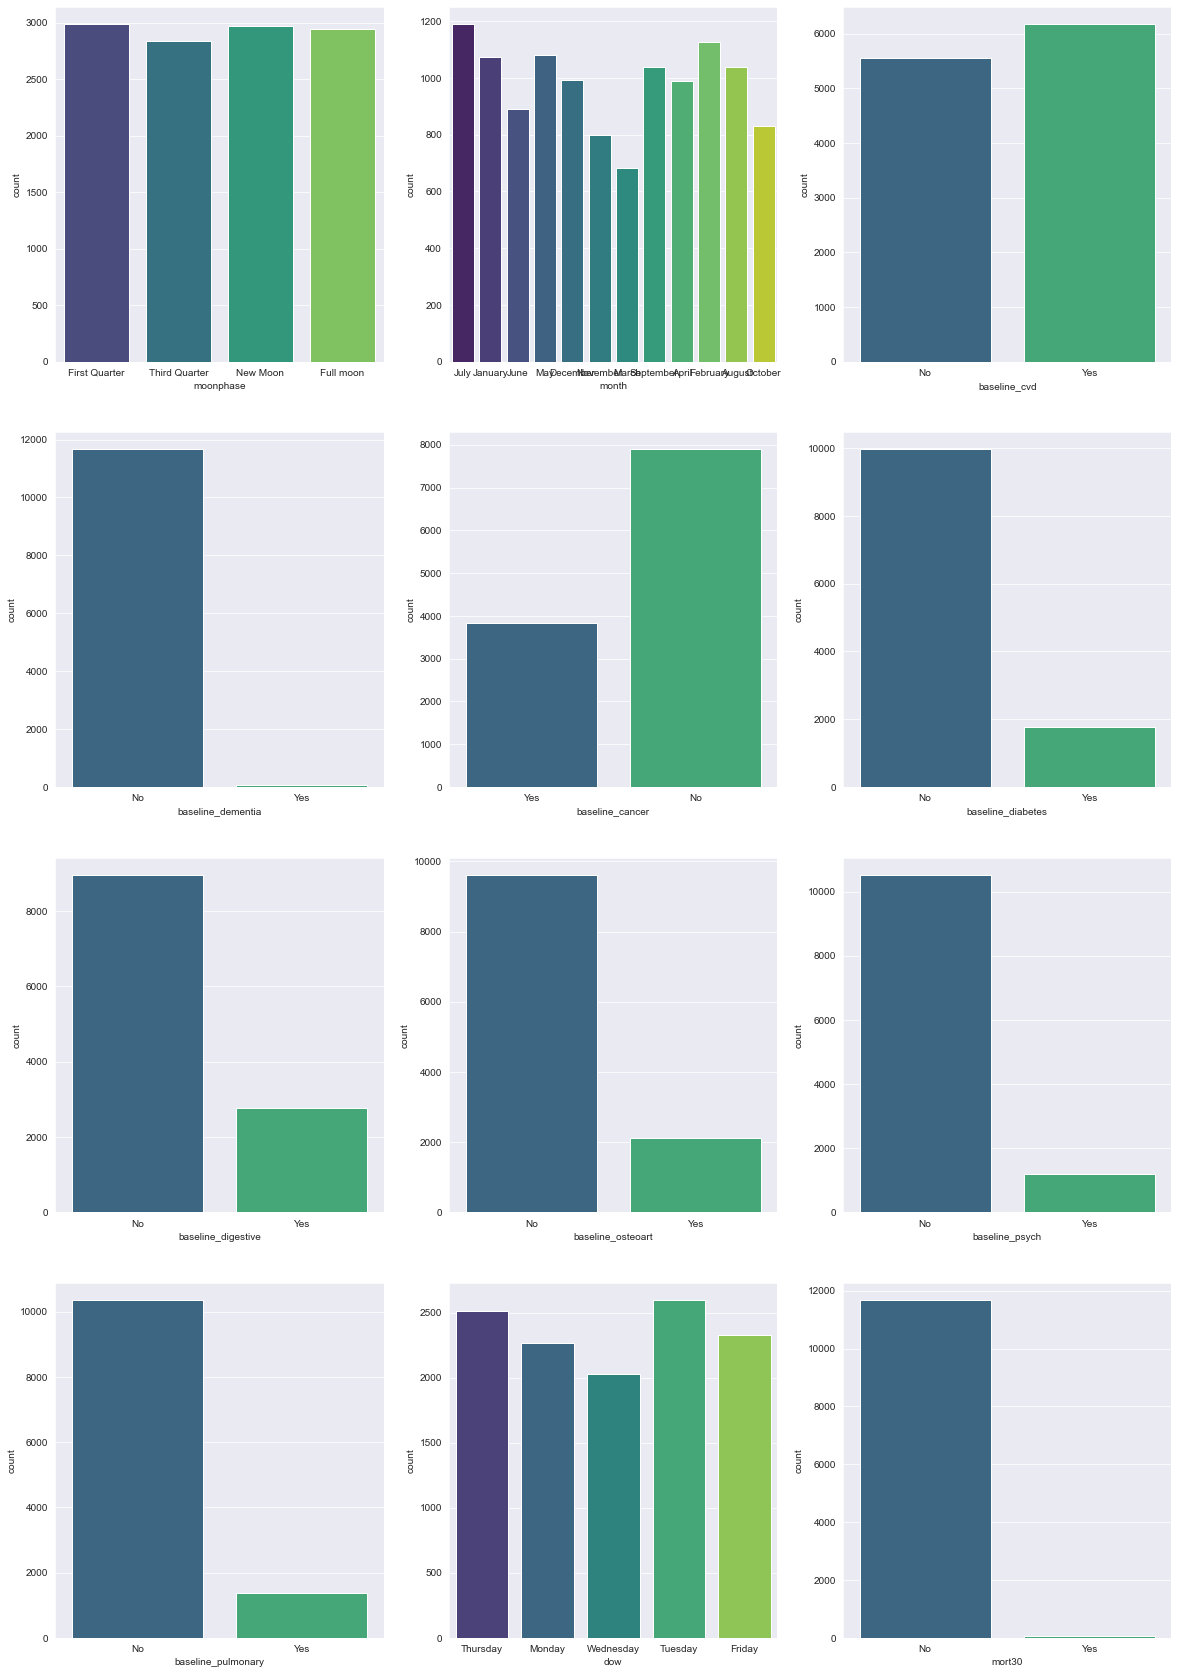

In [19]:
fig , axes = plt.subplots(4, 3,figsize = (20 , 30) )
sns.countplot(df.moonphase , ax = axes[0 , 0] , palette='viridis' )
sns.countplot(df.month ,ax = axes[0 , 1] ,palette='viridis')
sns.countplot(df.baseline_cvd , ax = axes[0 , 2] ,palette='viridis')
sns.countplot(df.baseline_dementia , ax = axes[1, 0] ,palette='viridis')
sns.countplot(df.baseline_cancer , ax = axes[1 , 1] ,palette='viridis')
sns.countplot(df.baseline_diabetes , ax = axes[1 , 2] , palette='viridis')
sns.countplot(df.baseline_digestive , ax  = axes[2, 0] ,palette='viridis')
sns.countplot(df.baseline_osteoart , ax = axes[2 , 1] ,palette='viridis')
sns.countplot(df.baseline_psych , ax = axes[2 , 2 ] ,palette='viridis')
sns.countplot(df.baseline_pulmonary , ax = axes[3 , 0] , palette='viridis')
sns.countplot(df.dow , ax = axes[3 , 1] , palette='viridis')
sns.countplot(df.mort30 , ax = axes[3 , 2] , palette='viridis')



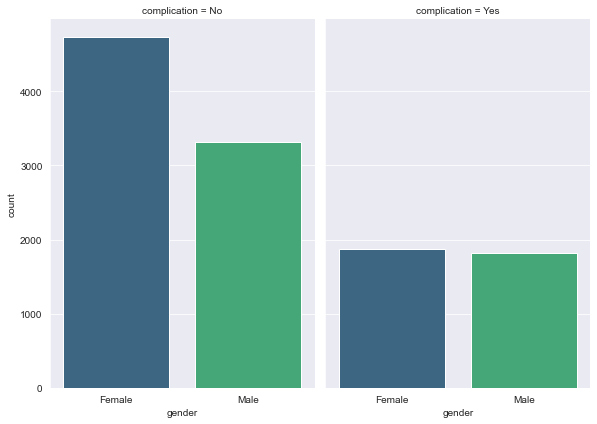

In [20]:
sns.catplot(x="gender",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')

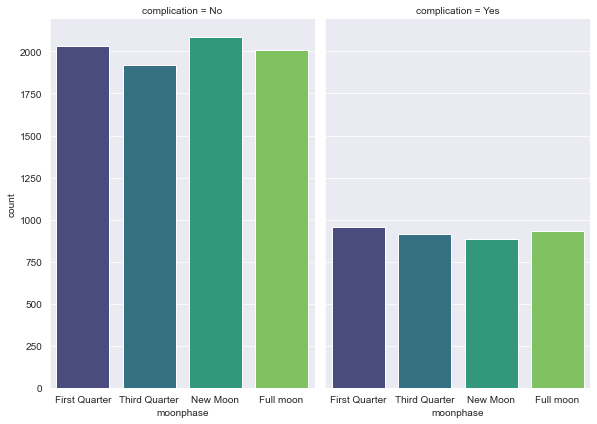

In [21]:
sns.catplot(x="moonphase",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')

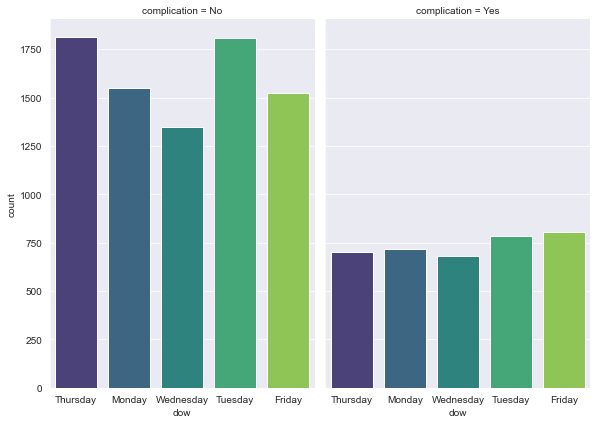

In [22]:
sns.catplot(x="dow",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')

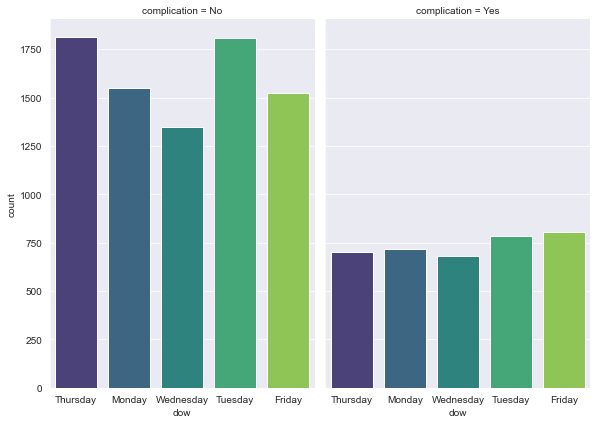

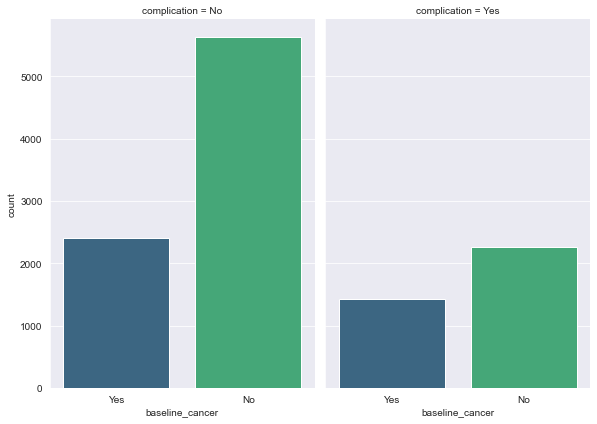

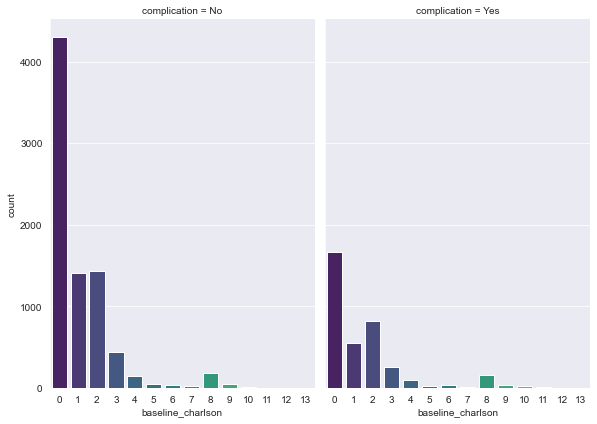

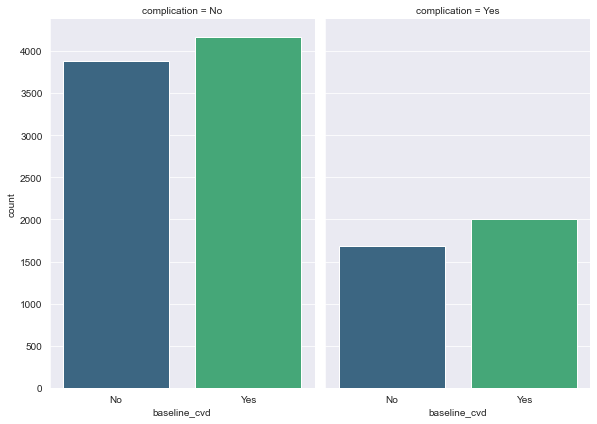

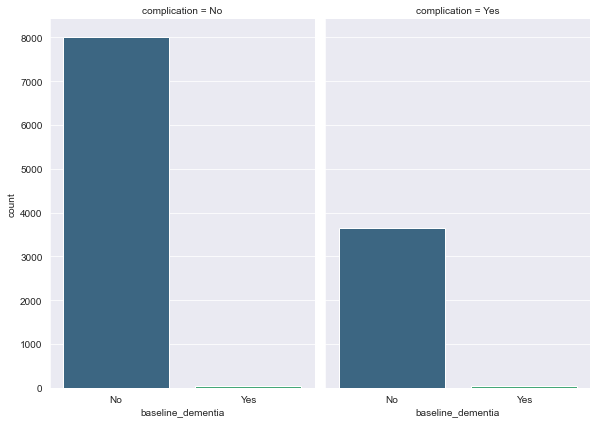

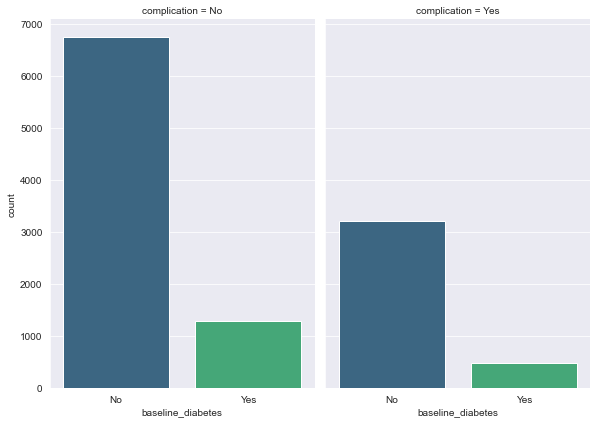

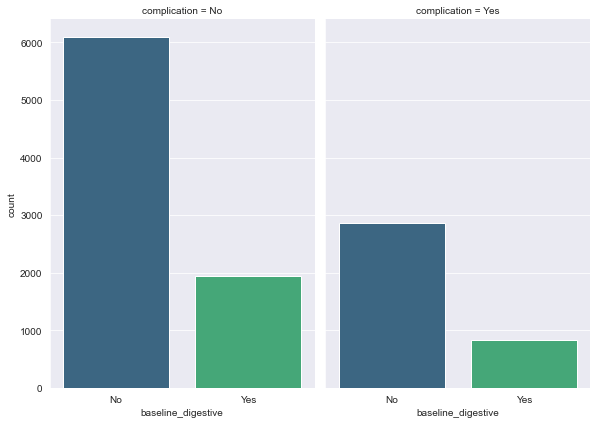

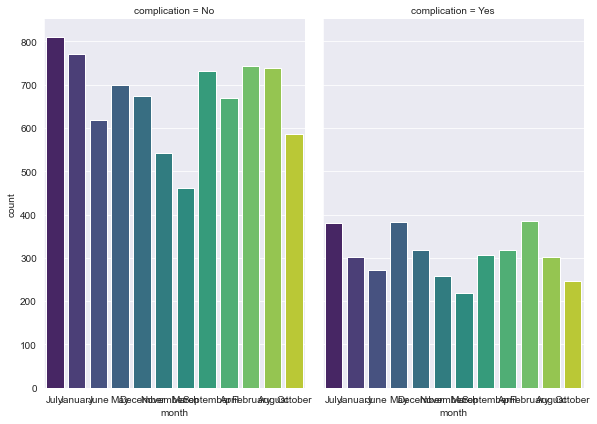

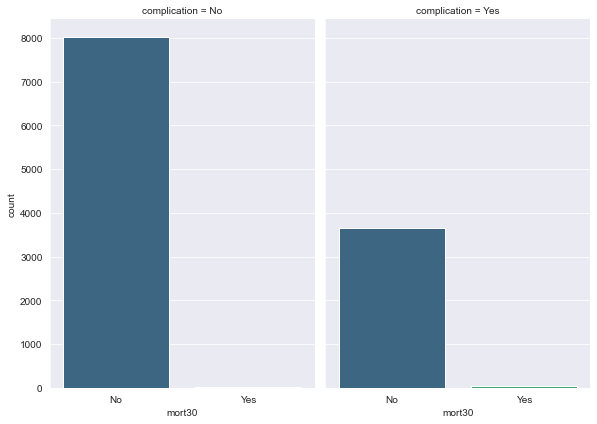

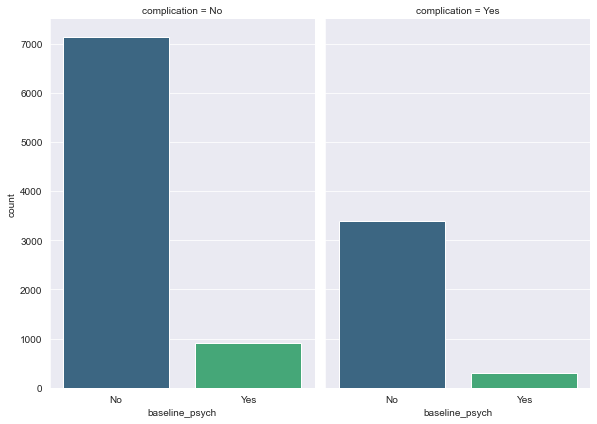

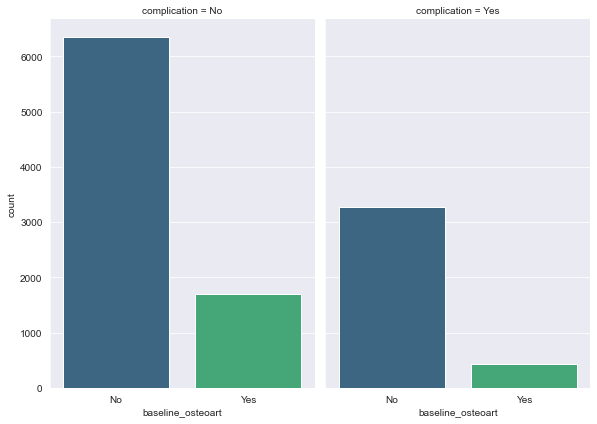

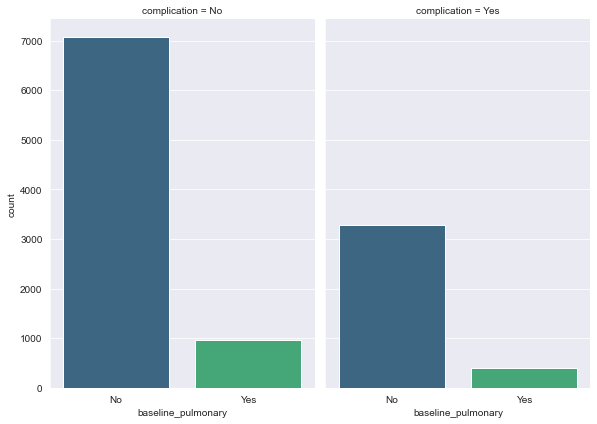

In [23]:

sns.catplot(x="dow",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_cancer',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_charlson',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_cvd',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_dementia',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_diabetes',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_digestive',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')
sns.catplot(x='month',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='mort30',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_psych',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_osteoart',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_pulmonary',col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis' )


<AxesSubplot:title={'center':'Age'}, xlabel='complication'>

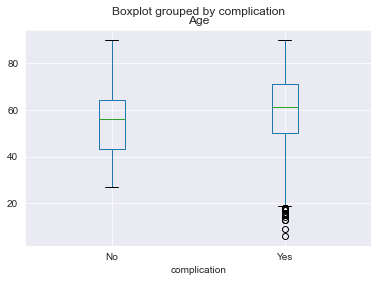

In [24]:
df.boxplot(column="Age",by="complication")

<AxesSubplot:title={'center':'bmi'}, xlabel='complication'>

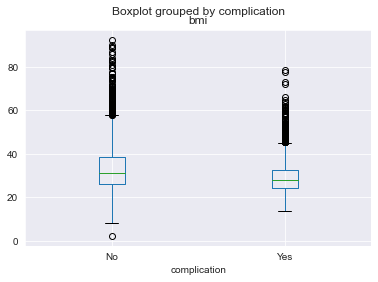

In [25]:
df.boxplot(column="bmi",by="complication")

## Converting Object Data type to numeric

In [26]:
df.dtypes[df.dtypes == 'object']

baseline_cancer       object
baseline_cvd          object
baseline_dementia     object
baseline_diabetes     object
baseline_digestive    object
baseline_osteoart     object
baseline_psych        object
baseline_pulmonary    object
dow                   object
gender                object
month                 object
moonphase             object
mort30                object
complication          object
dtype: object

In [27]:
df.complication.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_cancer.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.complication.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_cvd.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_dementia.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_diabetes.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_digestive.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_osteoart.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_osteoart.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_pulmonary.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.gender.replace({"Male" : 1 , "Female" : 0} , inplace = True)
df.baseline_psych.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.dow.replace({"Monday" :0 , "Tuesday": 1 , "Wednesday" : 2 , "Thursday" : 3,  "Friday" : 4} , inplace = True)
df.month.replace({"January" : 0 ,  "February" : 1, "March" : 2, "April" : 3,  "May" : 4, "June" : 5 ,"July" : 6,"August" : 7,"September": 8 , "October" : 9 , "November" : 10, "December" : 11} , inplace = True)
df.moonphase.replace({"New Moon" : 0 ,  "First Quarter" : 1 ,"Full moon" :2 , "Third Quarter" :3} , inplace = True)
df.mort30.replace({"Yes" :1 ,  "No" : 0} , inplace = True)

In [28]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

### Feature Selection

In [46]:
# Using Random Forest classifier
feat_imp = pd.DataFrame()
feat_imp['Features'] = df.iloc[: , 0: -1].columns
feat_imp['Score']      = rf.feature_importances_
feat_imp = feat_imp.sort_values('Score' ,    ascending=False)
feat_imp.Score[0:10].sum()
l1 = list(feat_imp.Features[0:10])
Final_Variables = l1.append('complication')

In [47]:
feat_imp.Score[0:8].sum()

0.9528919131558251

In [48]:
# Significant variables
list(feat_imp.Features[0:8])    

['Age',
 'complication_rsi',
 'ccsComplicationRate',
 'mortality_rsi',
 'bmi',
 'ccsMort30Rate',
 'ahrq_ccs',
 'baseline_charlson']

In [49]:
df1 = df

In [50]:
df = df1.loc[: , l1]
df.shape

(11733, 11)

## Sampling

In [51]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df , test_size=0.2 , random_state=42)

In [52]:
df_train.complication.value_counts()

complication
0    6416
1    2970
Name: count, dtype: int64

In [53]:
df_os = df_train[df_train.complication == 1]     
df_os.shape

(2970, 11)

In [54]:
df_train1 = pd.concat([df_train , df_os])    # Oversampling

In [55]:
df_train1.complication.value_counts()

complication
0    6416
1    5940
Name: count, dtype: int64

In [56]:
df_train = df_train1

In [57]:
df_train_x = df_train.iloc[: , 0:-1]
df_train_y = df_train.iloc[: , -1]
df_test_x = df_test.iloc[: , 0:-1]
df_test_y = df_test.iloc[: , -1]

In [58]:
print(df.shape , df_train_x.shape , df_train_y.shape , df_test_x.shape , df_test_y.shape)

(11733, 11) (12356, 10) (12356,) (2347, 10) (2347,)


In [59]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_train_x = sc.fit_transform(df_train_x)
df_test_x = sc.transform(df_test_x)

## Model Building

## Logistics Regression

In [60]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(df_train_x , df_train_y)

LogisticRegression(class_weight='balanced')

In [61]:
# Prediction on train data set
pred_logreg_train= logreg.predict(df_train_x)
# Confusion matrix
confusion_matrix(df_train_y , pred_logreg_train)

array([[4719, 1697],
       [2018, 3922]], dtype=int64)

In [62]:
Acc_tr  = accuracy_score(df_train_y , pred_logreg_train)
recall_tr    = recall_score(df_train_y , pred_logreg_train)
precision_tr = precision_score(df_train_y , pred_logreg_train)
f1_ratio_tr  = f1_score(df_train_y , pred_logreg_train)

In [63]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr ,"\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.699336354807381 
Recall_score =  0.6602693602693602 
Precision    =  0.6979889660081865 
F1_ratio     =  0.678605415693399


In [64]:
# Prediction on test
pred_logreg_test = logreg.predict(df_test_x)
#Confusion matrix
confusion_matrix(df_test_y , pred_logreg_test)

array([[1187,  440],
       [ 247,  473]], dtype=int64)

In [65]:
Acc_te  = accuracy_score(df_test_y , pred_logreg_test)
recall_te    = recall_score(df_test_y , pred_logreg_test)
precision_te = precision_score(df_test_y , pred_logreg_test)
f1_ratio_te  = f1_score(df_test_y , pred_logreg_test)

In [66]:
print("Accuracy     = " , Acc_te , "\nRecall_score = " , recall_te , "\nPrecision    = " , precision_te , "\nF1_ratio     = " , f1_ratio_te)

Accuracy     =  0.7072858968896464 
Recall_score =  0.6569444444444444 
Precision    =  0.5180722891566265 
F1_ratio     =  0.5793018983466014


In [68]:
print(classification_report(df_test_y , pred_logreg_test))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1627
           1       0.52      0.66      0.58       720

    accuracy                           0.71      2347
   macro avg       0.67      0.69      0.68      2347
weighted avg       0.73      0.71      0.72      2347



## Decision Tree

In [69]:
dt = DecisionTreeClassifier(class_weight='balanced')
# Hyperparameter tunning
search_dict = {"criterion" : ["gini" ,"entropy"] ,
              "max_depth" : range(5 ,9) , 
             "min_samples_split" : range(50 , 100 , 150 ) }
dt_search = GridSearchCV(dt , param_grid= search_dict)
dt_search.fit(df_train_x , df_train_y )

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 9),
                         'min_samples_split': range(50, 100, 150)})

In [70]:
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}

In [71]:
# Prediction on train data set
pred_dt_train= dt_search.predict(df_train_x)
# Confusion matrix
confusion_matrix(df_train_y , pred_dt_train)

array([[5851,  565],
       [1542, 4398]], dtype=int64)

In [72]:
Acc_tr  = accuracy_score(df_train_y , pred_dt_train)
recall_tr    = recall_score(df_train_y , pred_dt_train)
precision_tr = precision_score(df_train_y , pred_dt_train)
f1_ratio_tr  = f1_score(df_train_y , pred_dt_train)


In [73]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr , "\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.8294755584331499 
Recall_score =  0.7404040404040404 
Precision    =  0.8861575659883135 
F1_ratio     =  0.8067504356599102


In [74]:
# Prediction on test data set
pred_dt_test = dt_search.predict(df_test_x)
#Confusion matrix
confusion_matrix(df_test_y , pred_dt_test)

array([[1438,  189],
       [ 221,  499]], dtype=int64)

In [75]:
Acc_te  = accuracy_score(df_test_y , pred_dt_test)
recall_te    = recall_score(df_test_y , pred_dt_test)
precision_te = precision_score(df_test_y , pred_dt_test)
f1_ratio_te  = f1_score(df_test_y , pred_dt_test)

In [76]:
print("Accuracy     = " , Acc_te , "\nRecall_score = " , recall_te   , "\nPrecision    = " , precision_te , "\nF1_ratio     = " , f1_ratio_te)

Accuracy     =  0.8253089049850874 
Recall_score =  0.6930555555555555 
Precision    =  0.7252906976744186 
F1_ratio     =  0.7088068181818181


## Random Forest

In [78]:
rf = RandomForestClassifier(criterion='gini',
                             n_estimators=100,
                             max_depth=6,
                             min_samples_split=100,
                             min_samples_leaf=100,
                           class_weight='balanced')
rf.fit(df_train_x , df_train_y)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=100, min_samples_split=100)

In [79]:
# Prediction on train data set
pred_rf_train= rf.predict(df_train_x)
# Confusion matrix
confusion_matrix(df_train_y , pred_rf_train)

array([[5246, 1170],
       [1686, 4254]], dtype=int64)

In [80]:
Acc_tr  = accuracy_score(df_train_y , pred_rf_train)
recall_tr    = recall_score(df_train_y , pred_rf_train)
precision_tr = precision_score(df_train_y , pred_rf_train)
f1_ratio_tr  = f1_score(df_train_y , pred_rf_train)

In [81]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr ,"\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.7688572353512464 
Recall_score =  0.7161616161616161 
Precision    =  0.7842920353982301 
F1_ratio     =  0.7486800422386483


In [82]:
# prediction on test
pred_rf_test = rf.predict(df_test_x)
#Confusion matrix
confusion_matrix(df_test_y , pred_rf_test)

array([[1302,  325],
       [ 213,  507]], dtype=int64)

In [83]:
Acc_te  = accuracy_score(df_test_y , pred_rf_test)
recall_te    = recall_score(df_test_y , pred_rf_test)
precision_te = precision_score(df_test_y , pred_rf_test)
f1_ratio_te  = f1_score(df_test_y , pred_rf_test)

In [84]:
print("Accuracy     = " , Acc_te , "\nRecall_score = " , recall_te ,"\nPrecision    = " , precision_te , "\nF1_ratio     = " , f1_ratio_te)

Accuracy     =  0.7707711972731146 
Recall_score =  0.7041666666666667 
Precision    =  0.609375 
F1_ratio     =  0.6533505154639176


## Conclusion

1) Decision tree model performs better compared to Random forest and logistic regression. Since Decision tree model has both recall (Performace of class1)  and precision maximum .Recall is is 69.3% i.e. 69% of the time, it correctly predicts whether a patient will experience post-surgical problems based on multiple features.
 
2) According to exploratory data analysis , people between the ages of 60 and 90 have the highest risk of postsurgical problems.

3) The main factor affecting postoperative complications is age , followed by the complications rate, the complications stratification index, and so forth.


## Scope
Post Surgical Complications Prediction project can have several benefits and considerations:

Improved Patient Outcomes: Predicting post-surgical complications can lead to better patient outcomes by enabling early intervention and personalized care, reducing complications, and potentially saving lives.

Cost Reduction: Hospitals and healthcare providers can save significant costs by preventing complications that require additional treatments or readmissions. Fewer complications mean lower healthcare expenses.

Enhanced Reputation: Healthcare institutions that successfully implement such predictive projects can gain a reputation for providing high-quality care and being proactive in patient safety.